In [2]:
df = pd.read_excel('BODYTEMP.xlsx')
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         50 non-null     int64  
 1   GENDER     50 non-null     object 
 2   SMOKE      50 non-null     int64  
 3   DAY1-8AM   50 non-null     float64
 4   DAY1-12PM  50 non-null     float64
 5   DAY2-8AM   50 non-null     float64
 6   DAY2-12PM  50 non-null     float64
dtypes: float64(4), int64(2), object(1)
memory usage: 2.9+ KB
None
   ID  GENDER  SMOKE   DAY1-8AM  DAY1-12PM   DAY2-8AM  DAY2-12PM
0   1    Male      0  98.569233  98.448539  98.413730  98.276743
1   2  Female      1  98.285684  98.884322  98.953571  98.928199
2   3    Male      0  98.142176  98.048973  97.496258  98.607047
3   4    Male      1  98.049448  98.236169  98.392317  97.877131
4   5    Male      0  97.460739  98.203946  98.429941  98.586590


In [4]:
dong = len(df) # Số dòng ban đầu
df_cleaned = df.dropna()
final_rows = len(df_cleaned) # Số dòng sau khi xoá

print(f"\nĐã xoá {dong - final_rows} dòng có dữ liệu trống.")
print(f"Số dòng còn lại để phân tích: {final_rows}")


Đã xoá 0 dòng có dữ liệu trống.
Số dòng còn lại để phân tích: 50


$$
\bar{x} \pm t_{\alpha/2,\,n-1} \cdot \frac{s}{\sqrt{n}}
$$
Câu 1: Phân tích dữ liệu BODYTEMP (n=50)b.   
Khoảng tin cậy 95% cho trung bình nhiệt độ (DAY1-8AM)Thu thập số liệu:Số mẫu $n = 50$.   
Trung bình mẫu (DAY1-8AM): $\bar{x} \approx 98.1985$.  
Độ lệch chuẩn mẫu: $s \approx 0.4594$.  
Xác định các tham số:Độ tin cậy 95% $\implies \alpha = 0.05 \implies \alpha/2 = 0.025$.  
Bậc tự do $df = n - 1 = 49$.  
Giá trị $t$ (tra bảng $t_{49, 0.025}$): $t \approx 2.0096$.  
Công thức: Khoảng tin cậy (KTC) cho trung bình: $\bar{x} \pm t_{\alpha/2} \cdot (\frac{s}{\sqrt{n}})  
$Tính toán:Sai số chuẩn (SE): $\frac{s}{\sqrt{n}} = \frac{0.4594}{\sqrt{50}} \approx   0.06497$.
Biên lỗi (ME): $2.0096 \cdot 0.06497 \approx 0.1305$.  
KTC: $98.1985 \pm 0.1305$  
.Kết quả: Khoảng tin cậy 95% là $[98.0680, 98.3290]$  

In [5]:
import scipy.stats as st
#b. Tìm khoảng tin cậy 95% cho trung bình nhiệt độ ngày 1 lúc 8 giờ (DAY1 -8AM).
data = df["DAY1-8AM"]

# Tính các đại lượng
x_bar = np.mean(data)           # trung bình mẫu (x̄)
s = np.std(data, ddof=1)        # độ lệch chuẩn mẫu (s)
n = len(data)                   # kích thước mẫu (n)
alpha = 0.05                    # mức ý nghĩa (1 - độ tin cậy = 0.05)
t_alpha = st.t.ppf(1 - alpha/2, df=n-1)  # giá trị t_(α/2, n-1)
margin = t_alpha * s / np.sqrt(n)        # sai số chuẩn (phần ±)

# Khoảng tin cậy
lower = x_bar - margin
upper = x_bar + margin

print(f"Trung bình mẫu (x̄): {x_bar:.3f}")
print(f"Độ lệch chuẩn mẫu (s): {s:.3f}")
print(f"Kích thước mẫu (n): {n}")
print(f"Giá trị t_(α/2, n-1): {t_alpha:.3f}")
print(f"Khoảng tin cậy 95%: ({lower:.3f}, {upper:.3f})")

Trung bình mẫu (x̄): 98.199
Độ lệch chuẩn mẫu (s): 0.459
Kích thước mẫu (n): 50
Giá trị t_(α/2, n-1): 2.010
Khoảng tin cậy 95%: (98.068, 98.329)


In [27]:
# (c) Khoảng tin cậy 95% cho DAY2-8AM theo giới tính

# --- Nam ---
nam = df[df["GENDER"] == "Male"]["DAY2-8AM"]
print(len(nam))
x_bar_m = nam.mean()
s_m = nam.std(ddof=1)
n_m = len(nam)
t_m = st.t.ppf(1 - alpha/2, df=n_m-1)
margin_m = t_m * s_m / np.sqrt(n_m)
CI_m = (x_bar_m - margin_m, x_bar_m + margin_m)

# --- Nữ ---
nu = df[df["GENDER"] == "Female"]["DAY2-8AM"]
print(len(nu))

x_bar_f = nu.mean()
s_f = nu.std(ddof=1)
n_f = len(nu)
t_f = st.t.ppf(1 - alpha/2, df=n_f-1)
margin_f = t_f * s_f / np.sqrt(n_f)
CI_f = (x_bar_f - margin_f, x_bar_f + margin_f)

print("Khoảng tin cậy 95% cho DAY2-8AM theo giới tính: ")
print(f"Nam: x̄={x_bar_m:.3f}, s={s_m:.3f}, n={n_m}, CI={CI_m}")
print(f"Nữ : x̄={x_bar_f:.3f}, s={s_f:.3f}, n={n_f}, CI={CI_f}\n")

23
27
Khoảng tin cậy 95% cho DAY2-8AM theo giới tính: 
Nam: x̄=98.314, s=0.493, n=23, CI=(np.float64(98.02407501938731), np.float64(98.60349325226048))
Nữ : x̄=98.390, s=0.450, n=27, CI=(np.float64(98.14909120413593), np.float64(98.63068292477963))



In [7]:
# (d) Tỷ lệ người có nhiệt độ tăng (DAY2-12PM > DAY1-8AM)

count_increase = (df["DAY2-12PM"] > df["DAY1-8AM"]).sum()
n_total = len(df)
p_hat = count_increase / n_total
alpha = 0.10  # khoảng tin cậy 90%
z_alpha = st.norm.ppf(1 - alpha/2)

SE_p = np.sqrt(p_hat * (1 - p_hat) / n_total)  # sai số chuẩn
margin_p = z_alpha * SE_p
CI_p = (p_hat - margin_p, p_hat + margin_p)

print("💡 (d) CI90% cho tỷ lệ người tăng nhiệt độ:")
print(f"p̂ = {p_hat:.3f}, n = {n_total}, z = {z_alpha:.3f}")
print(f"CI90% = ({CI_p[0]:.3f}, {CI_p[1]:.3f})\n")


💡 (d) CI90% cho tỷ lệ người tăng nhiệt độ:
p̂ = 0.700, n = 50, z = 1.645
CI90% = (0.593, 0.807)



In [18]:
# (e) Nhóm hút thuốc: tỷ lệ người có nhiệt độ TB > 98
smokers = df[df["SMOKE"] == 1].copy()
smokers["MEAN_TEMP"] = smokers[["DAY1-8AM", "DAY1-12PM", "DAY2-8AM", "DAY2-12PM"]].mean(axis=1)

count_over_98 = (smokers["MEAN_TEMP"] > 98).sum()
n_s = len(smokers)
p2_hat = count_over_98 / n_s

alpha = 0.01  # 99%
z_alpha2 = st.norm.ppf(1 - alpha/2)
SE_p2 = np.sqrt(p2_hat * (1 - p2_hat) / n_s)
margin_p2 = z_alpha2 * SE_p2
CI_p2 = (p2_hat - margin_p2, p2_hat + margin_p2)

print(" CI99% cho tỷ lệ người hút thuốc có nhiệt độ TB > 98:")
print(f"p̂ = {p2_hat:.3f}, n = {n_s}, z = {z_alpha2:.3f}")
print(f"CI99% = ({CI_p2[0]:.3f}, {CI_p2[1]:.3f})\n")


 CI99% cho tỷ lệ người hút thuốc có nhiệt độ TB > 98:
p̂ = 0.966, n = 29, z = 2.576
CI99% = (0.878, 1.053)



C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20648\3420171525.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


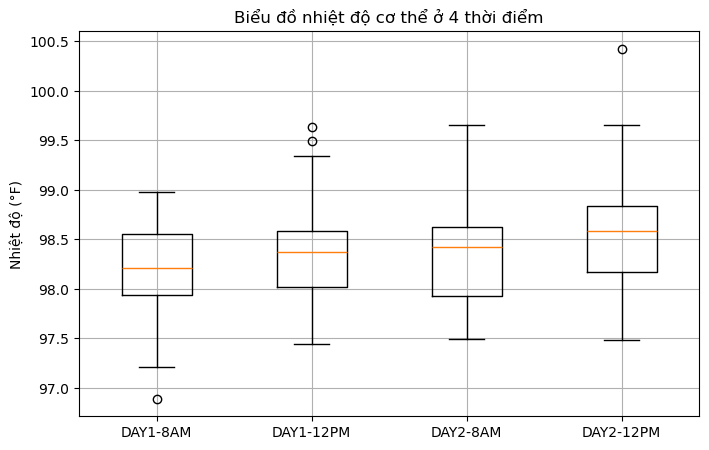

In [19]:
# (f) Vẽ biểu đồ 4 thời điểm
# ------------------------------
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.boxplot(
    [df["DAY1-8AM"], df["DAY1-12PM"], df["DAY2-8AM"], df["DAY2-12PM"]],
    labels=["DAY1-8AM", "DAY1-12PM", "DAY2-8AM", "DAY2-12PM"]
)
plt.title("Biểu đồ nhiệt độ cơ thể ở 4 thời điểm")
plt.ylabel("Nhiệt độ (°F)")
plt.grid(True)
plt.show()

Câu 2 (3 điểm). Giả sử chiều cao của sinh viên nam trong một trường đại học A tuân
theo phân phối chuẩn với chiều cao trung bình là 170 cm và độ lệch chuẩn là 6 cm.  
a. Chọn ngẫu nhiên một sinh viên nam trong Trường A, tính xác suất sinh viên đó có
chiều cao trên 175 cm.  
b. Xác định chiều cao mà 90% sinh viên nam trong Trường A đều thấp hơn giá trị đó.    
c. Bàn ghế của Trường A phù hợp cho sinh viên có chiều cao từ 160 cm đến 180 cm.  
Tính tỷ lệ sinh viên nam trong trường có thể ngồi thoải mái với loại bàn ghế này.

In [20]:
import scipy.stats as st

mu = 170         # trung bình (μ)
sigma = 6        # độ lệch chuẩn (σ)
x = 175          # giá trị cần xét

# Xác suất
P_X_leq_175 = st.norm.cdf(x, loc=mu, scale=sigma)   # P(X ≤ 175)
P_X_gt_175 = 1 - P_X_leq_175                        # P(X > 175)

print(" Xác suất sinh viên cao > 175 cm:")
print(f"P(X ≤ 175) = {P_X_leq_175:.4f}")
print(f"P(X > 175) = {P_X_gt_175:.4f}")


 Xác suất sinh viên cao > 175 cm:
P(X ≤ 175) = 0.7977
P(X > 175) = 0.2023


In [21]:
P_target = 0.9                        # Xác suất yêu cầu
x_0_9 = st.norm.ppf(P_target, loc=mu, scale=sigma)  # giá trị x tương ứng

print("\nChiều cao mà 90% sinh viên thấp hơn:")
print(f"x_0.9 = {x_0_9:.2f} cm")



Chiều cao mà 90% sinh viên thấp hơn:
x_0.9 = 177.69 cm


c. Tỷ lệ sinh viên có thể ngồi thoải mái với bàn ghế (160–180 cm)
𝑃
(
160
<
𝑋
<
180
)
=
𝑃
(
𝑋
<
180
)
−
𝑃
(
𝑋
<
160
)
P(160<X<180)=P(X<180)−P(X<160)

In [23]:
x1, x2 = 160, 180  # giới hạn khoảng phù hợp

P_X_lt_180 = st.norm.cdf(x2, loc=mu, scale=sigma)
P_X_lt_160 = st.norm.cdf(x1, loc=mu, scale=sigma)
P_comfort = P_X_lt_180 - P_X_lt_160

print(" Tỷ lệ sinh viên ngồi thoải mái (160–180 cm):")
print(f"P(X < 180) = {P_X_lt_180:.4f}")
print(f"P(X < 160) = {P_X_lt_160:.4f}")
print(f"P(160 < X < 180) = {P_comfort:.4f}  ({P_comfort*100:.2f}%)")


 Tỷ lệ sinh viên ngồi thoải mái (160–180 cm):
P(X < 180) = 0.9522
P(X < 160) = 0.0478
P(160 < X < 180) = 0.9044  (90.44%)


Câu 1 (7 điểm). Cho file dữ liệu 1: BODYTEMP.xlsx
a. Đọc file và hiển thị thông tin của file dữ liệu, xoá các dòng có dữ liệu trống.  
b. Tìm khoảng tin cậy 95% cho trung bình nhiệt độ ngày 1 lúc 8 giờ (DAY1 -8AM).  
c. Tìm khoảng tin cậy 95% cho:   
- Trung bình nhiệt độ ngày 2 lúc 8 giờ (DAY2 -8AM) của nam.  
- Trung bình nhiệt độ ngày 2 lúc 8 giờ (DAY2 -8AM) của nữ.  
d. Tính tỷ lệ người có nhiệt độ cơ thể tăng vào 12 giờ ngày 2 so với 8 giờ, ngày 1. Tìm  
khoảng tin cậy 90% cho tỷ lệ này của tổng thể.  
e. Trong nhóm những người có hút thuốc, tính tỷ lệ người có nhiệt độ trung bình (trong 4  
thời điểm đo) lớn hơn 98. Tìm khoảng tin cậy 99% cho tỷ lệ này.  
f.Vẽ biểu đồ trực quan nhiệt độ ở cả 4 thời điểm.